# 2022 NZMSA Data Science Submission.

In [18]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [128]:
dataset = pd.read_csv("weather-data.csv")

In [129]:
# This lineof code shows the statistical data of the data set including:
# Mean - Average value of the data.
# std (Standard Deviation) - a measure of the amount of variation or dispersion of a set of values.
# min - The minimum value
# 10% - The 10th percentile value.
# 50% - Median.
# 90% - The 90th percentile value.
# max - The maximum value
dataset.describe(percentiles=[0.1, 0.9])

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
10%,11.000000,7.000000,62.690000,3.000000,23.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
90%,21.000000,17.000000,93.830000,16.000000,38.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


<AxesSubplot:>

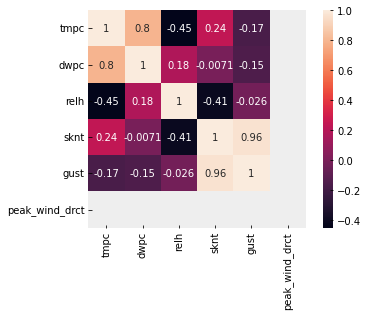

In [130]:
# Values nearing one or negative one can have a pattern where a(x) = k*b(x)
# Values closer to the 0 value indicates the plot of a(x) and b(x) has no noticeable pattern.

sns.heatmap(dataset.corr(), annot=True, square=True)

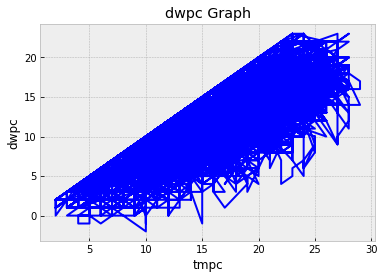

In [131]:
# Plot of Temperature of the dew point in the environment in celsius
# over Temperature of the environment in celsius.

plt.style.use("bmh")
plt.figure()

plt.plot(dataset["tmpc"], dataset["dwpc"], color="blue")
plt.title("dwpc Graph")
plt.xlabel("tmpc")
plt.ylabel("dwpc")

plt.show()

# Data Processing

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

dataset = pd.read_csv("weather-data.csv")
try:
    dataset.drop(columns=["station", "valid", "gust", "peak_wind_drct"], inplace=True)
except Exception:
    dataset.drop(columns=[" station", "valid", "gust", "peak_wind_drct"], inplace=True)
dataset.head()

,tmpc,dwpc,relh,sknt
0,21.0,11.0,52.77,15.0
1,21.0,10.0,49.37,16.0
2,21.0,12.0,56.38,16.0
3,21.0,13.0,60.21,16.0
4,21.0,12.0,56.38,16.0


In [8]:
# Remove rows that contain null value

dataset.dropna(axis=0, how='any', subset=None, inplace=True)

In [9]:

X_train, X_test, y_train, y_test = train_test_split(dataset[["tmpc", "relh", "sknt"]], dataset["dwpc"], test_size=0.2)

In [136]:
# Firstly I removed "station", "valid", "gust", "peak_wind_drct", where 
# were either non-number data, or include many null data in the DataFrame.
# Then, I used dropna() to remove rows that contain null data, so that
# the DataFrame have no null.

# Data Modelling

In [1]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

import pandas as pd

# Just one of the models capable of modelling our dataset.
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
model.score(X_test, y_test)

0.994139762202902

In [14]:
# Assuming that ther are 30 days in a month

model.predict(dataset[-30*24*2:][["tmpc", "relh", "sknt"]])

array([13.89564518, 13.91874563, 13.90719541, ..., 13.82633852,
       13.83788875, 14.16396214])

# Conclusion

* The score of this model is very high which can be 0.99457 with three inputs and one output. It is confidential to say that the additional month that predicted is likely to be accurate.